________Experiment 1 ________
The iteration 1
The iteration 2
The iteration 3
The iteration 4
The iteration 5
The iteration 6
The iteration 7
The iteration 8
The iteration 9
The iteration 10
The iteration 11
The iteration 12
The iteration 13
The iteration 14
The iteration 15
The iteration 16
The iteration 17
The iteration 18
The iteration 19
The iteration 20
[[57.2 30.4 12.4]
 [71.8 19.6  8.6]
 [79.6 12.4  8. ]
 [82.2 13.4  4.4]
 [85.6 10.4  4. ]
 [26.8 31.8 41.4]
 [80.6 13.6  5.8]
 [79.  14.   7. ]
 [79.8 13.   7.2]
 [81.2 11.   7.8]
 [86.2  9.   4.8]]
[500.0, 1500.0, 2500.0, 3500.0, 4500.0, 5000.0, 5500.0, 6500.0, 7500.0, 8500.0, 9500.0]
(20,) (20, 4) (11,) (11, 3)
Completed
The duration of the experiment was 133.85503840446472 seconds


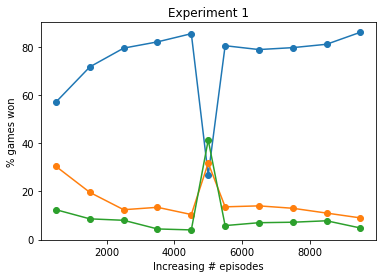

In [14]:
import random
import pyspiel
import numpy as np
import minimax as mx
import random_agent as rd
import rl_environment as rlen
import time as tm
import copy as cp
import matplotlib.pyplot as plt
import tabular_qlearner as tq
import tabular_Q_sym as tqs


game = pyspiel.load_game("tic_tac_toe")
#print(game)

rlEnvironment =rlen.Environment(game)
'''______________create class players_________________'''
class minimaxP():
    def __init__(self):
        pass
    def make_move(self,state,legal_actions,maximizing_player_id):
        alph#a = -1
        beta = 1
        depth = len(legal_actions)
        value_function = 0
        val, action = mx._alpha_beta(state, depth, alpha, beta, value_function,
                        maximizing_player_id)
        return action

    
class qlearnerP(tq.QLearner):    
    def __init__(self,player,num):        
        super().__init__(player,num)
        self._player_id = player
        self._num_action = num
        
class qlearnerS(tqs.QLearner):    
    def __init__(self,player,num):        
        super().__init__(player,num)
        self._player_id = player
        self._num_action = num
        
    
class randomP(rd.RandomAgent):
    def __init__(self,player,num):
        #pas#s
        super().__init__(player,num)
        self._player_id = player
        self._num_action = num
        
'''______________The game is run here_________________'''    
def numRounds(num,itera,player1,player2,player3):
    rewardP1 = 0
    rewardP2 = 0
    for i in range(num):
        
        #print('Tracker')
        state = game.new_initial_state()
        #print('Initial',state)
        #print('___iteration',i,'__')
        while not state.is_terminal():
          legal_actions = state.legal_actions()

          #print(type(legal_actions))       
          #print(legal_actions)
          #print(state,'\n____')

          player = state.current_player()  
          depth = len(legal_actions)
        
          if player == 0:  
            if itera%2 ==0:
            #if itera >= 0:
                state_eval = True
            else:
                state_eval = False
            #print('This is i',i,state_eval)    
                
            rlEnvironment.set_state(state)
            time_stepping = rlEnvironment.get_time_step()
            #action,probs = player1.step(time_stepping, is_evaluation = state_eval)
            #print('legal actions player 1',legal_actions)
            action,probs = player1.step(time_stepping)            
            #if itera%2 ==0:
                #action,prob = player3.step(time_stepping)  
            state.apply_action(action)
            #print('Length QVal Player1',len(player1._q_values))                   
            #info_state = str(time_stepping.observations["info_state"][player1._player_id])
            #print(len(player1._q_values))
            #[info_state])
            
          else:
            
            #action = player2.make_move(state,legal_actions,player)
            rlEnvironment.set_state(state)
            time_stepping = rlEnvironment.get_time_step()
            action,prob = player2.step(time_stepping) 
            if itera%2 ==0:
                action,prob = player3.step(time_stepping) 
                #print ('rand eval', action)
            
            state.apply_action(action)
            #print('Length QVal Player2',len(player2._q_values))
            
          rP1 = state.player_reward(0)
          rP2 = state.player_reward(1)
          if rP1 >0:
            rewardP1 += rP1
          elif rP2 >0:
            rewardP2 += rP2
          #print(state)
        if itera%2 ==0:
            pass
        else:
            rlEnvironment.set_state(state)
            time_stepping = rlEnvironment.get_time_step()
            player1.step(time_stepping)           
            player2.step(time_stepping)
        #print('LengthQv',len(player1._q_values))
        #print(state)
    draws = num-rewardP1-rewardP2
    #print(state)
    return rewardP1, rewardP2,draws   
  
def runIterations(num, itera,player1,player2,player3):
    iterations = itera
    numMatches = num  
        
    #print(lenDict,len(self.dictionary))
       
    x =  np.zeros(iterations)
    y =  np.zeros((iterations,4))
    avges =  np.zeros((iterations,3))
    ave = np.zeros((3))
    sdv = np.zeros((iterations,3))
         
    
    #print(x,'\n',y)
    for i in range(0,iterations):
            
        print('The iteration',(i+1))
        x[i] = (i+1)*numMatches
        y[i,[(0,1,2)]] = numRounds(numMatches,i,player1,player2,player3)
        total = sum(y[i,:])    
        #print(x,'\n',y)
        #print('The ave\n',ave)   
            
        #print ('Total',total)
        y[i,3] = total
            
    y = y*100/numMatches
    ave[0] = sum(y[:,0])/iterations
    ave[1] = sum(y[:,1])/iterations
    ave[2] = sum(y[:,2])/iterations
    add1 =  np.zeros((iterations)) + (ave[0])
    add2 =  np.zeros((iterations)) + (ave[1])
    add3 =  np.zeros((iterations)) + (ave[2])
        
    avges[:,0] = add1
    avges[:,1] = add2
    avges[:,2] = add3
        
    sdv1 = np.zeros((iterations))
    sdv2 = np.zeros((iterations))
    sdv3 = np.zeros((iterations))
    
    for j in range(0,iterations):
        sdv1[j] = (y[j,0]-add1[j])**2
        sdv2[j] = (y[j,1]-add2[j])**2
        sdv3[j] = (y[j,2]-add3[j])**2
    
    sdv1 = np.zeros((iterations)) + np.sqrt(sum(sdv1)/iterations)
    sdv2 = np.zeros((iterations)) + np.sqrt(sum(sdv2)/iterations)
    sdv3 = np.zeros((iterations)) + np.sqrt(sum(sdv3)/iterations)
    sdv[:,0] = sdv1
    sdv[:,1] = sdv2
    sdv[:,2] = sdv3
    #print(y,x,avges,sdv)
    return y,x,avges,sdv

def runExperiment(num,itera,expe):
    experiments = expe
    #startT = tm.time()
  
    xs = (range(1,(experiments+1)))        
    aveP1 = np.zeros(experiments)
    aveP2 = np.zeros(experiments)
    aveDr = np.zeros(experiments)
    sdvP1 = np.zeros(experiments)
    sdvP2 = np.zeros(experiments)
    sdvDr = np.zeros(experiments)
    yP1=np.zeros((experiments,itera))
    yP2=np.zeros((experiments,itera))
    yP3=np.zeros((experiments,itera))
    ySDev=np.zeros((3,itera))
    yAve= np.zeros((3,itera))
    for k in range(0,experiments):
        
        player1= qlearnerP(0,9)
        #player1= qlearnerS(0,9)
        #print('Player 1',player1)
        #player1 = randomP(0,9)
        #player1 = minimaxP()
        #player1 = randomP() 
        
        
        #player2 = randomP(1,9)
        #player2= qlearnerS(1,9)
        #player2 = minimaxP()
        player2 = qlearnerP(1,9)
        #player2 = randomP(1,9)         
        #print('Player 2',player2)
        
        #Evaluate against these player
        #player3 = randomP(0,9) 
        player3 = randomP(1,9) 
        #player3 = minimaxP()
        
                
        print('________Experiment',(k+1),'________')

        
        y,x,aver,stdev = runIterations(num,itera,player1,player2,player3)
        #print('Exes',x)
        #print('Whyes',y)
        #print('Aver',aver)
        #print('Standard dev',stdev)
        yEval0 = []
        yEval1 = []
        yEval2 = []
        yEval3 = []
        #xIndx = [0,4,9,14,19]
        #xIndx = [0,1,3,5,7,9,11,13,15,17,19]
        xIndx = [0,2,4,6,8,9,10,12,14,16,18]
        xAxis = []
        #print(itera/4)
        for i in xIndx:
            yEval0.append(y[i,0])
            yEval1.append(y[i,1])
            yEval2.append(y[i,2])
            yEval3.append(y[i,3])
            xAxis.append(x[i])
        yEval = np.transpose(np.array([yEval0,yEval1,yEval2]))
        print(yEval)
        print(xAxis)
        #print(np.shape(y))
        yP1[k,:] = y[:,0]
        yP2[k,:] = y[:,1]
        yP3[k,:] = y[:,2]        
        
        #print('y2\n',yP1,y)
        
        ''' To plot each experiment'''             
        plt.figure(k)
        plt.title("Experiment "+str(k+1))
        plt.ylabel("% games won")
        plt.xlabel("Increasing # episodes")
        print(np.shape(x),np.shape(y),np.shape(xAxis),np.shape(yEval))    
        #plt.plot(x,y,x,aver)
        #plt.plot(x,y,xAxis,yEval,'-o')
        
        #f,ax = plt.subplots(1)
        #ax.set_ylim(ymin = 0)        
        #xdata = xAxis
        #ydata = yEval[:,0]
        #ax.plot( xdata , ydata)
        #plt.show(f)
        
        plt.plot(xAxis,yEval,'-o')
        #plt.legend(("Player 1","Player 2","Draws","Total episodes","Average Player 1","Average Player 2","Average Draws"),loc='upper right')
        '''
        plt.plot(x,y)
        '''
        #plt.legend(("Player 1","Player 2","Draws","Total episodes","Player 1","Player 2","Draws"),loc='upper right')            
            
        aveP1[k] = aver[0,0]
        aveP2[k] = aver[0,1]
        aveDr[k] = aver[0,2]
            
        sdvP1[k] = stdev[0,0]
        sdvP2[k] = stdev[0,1]
        sdvDr[k] = stdev[0,2]
            
        #print('Aver Experiment\n',aveP1,'\n',aveP2,'\n',aveDr)
        #print('Standard dev Experiment\n',sdvP1,'\n',sdvP2,'\n',sdvDr)
    for i in range(itera):
        
        yAve[0,i] = sum(yP1[:,i])/expe
        yAve[1,i] = sum(yP2[:,i])/expe
        yAve[2,i] = sum(yP3[:,i])/expe
    #print('Yave',yAve,'\nYP1',yP1)    
    for i in range(itera):
        #ySDev=np.zeros((3,itera))
        yP1[:,i] = ((yP1[:,i]-yAve[0,i])**2)
        yP2[:,i] = ((yP2[:,i]-yAve[1,i])**2)
        yP3[:,i] = ((yP3[:,i]-yAve[2,i])**2)
        
    for i in range(itera):    
        ySDev[0,i] = np.sqrt(sum(yP1[:,i])/expe)
        ySDev[1,i] = np.sqrt(sum(yP2[:,i])/expe)
        ySDev[2,i] = np.sqrt(sum(yP3[:,i])/expe)
    
    
    #print('Yave',yAve,'\nYP1',yP1,'\nsDev',ySDev)
    '''
    plt.figure(k+1)
    plt.title("Experiment Averages and Standard Deviation ")
    plt.ylabel("% avarage wins")
    plt.xlabel("Experiment #")
        
    plt.errorbar(xs,aveP1,yerr = sdvP1, fmt = '-o')
    plt.errorbar(xs,aveP2,yerr = sdvP2, fmt = '-o')
    plt.errorbar(xs,aveDr,yerr = sdvDr, fmt = '-o')
    plt.legend(("Player 1","Player 2","Draws"),loc = 'upper right')
    #print(np.shape(xs),np.shape(aveP1))
    
    plt.figure(k+2)
    plt.title("Learning Averages and Standard Deviation ")
    plt.ylabel("% avarage wins")
    plt.xlabel("Iterations #")
    #print(np.shape(range(itera)),np.shape(yAve),np.shape(ySDev))
    plt.errorbar((range(itera)),yAve[0,:],yerr = ySDev[0,:], fmt = '-o')
    plt.errorbar((range(itera)),yAve[1,:],yerr = ySDev[1,:], fmt = '-o')
    plt.errorbar((range(itera)),yAve[2,:],yerr = ySDev[2,:], fmt = '-o')

    plt.legend(("Player 1","Player 2","Draws"),loc = 'upper right')
    '''
    return "Completed"


start_time = tm.time()
print(runExperiment(500,20,1))
end_time = tm.time()
print('The duration of the experiment was',(end_time-start_time),'seconds')

In [ ]:
list('9999')


In [ ]:
#help(game)
#help(state)
#help(randomP.step)
#help(state.is_terminal)
#help(pyspiel.State)
#help(pyspiel.Game)
#help(pyspiel.Game.num_distinct_actions)
help(game.num_distinct_actions)


In [8]:
100%15


10

In [ ]:
a = isNul

In [ ]:
type(legal_actions)